In [ ]:
import pandas as pd , numpy as np ,matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Human_Activity_Recognition_Using_Smartphones_Data.csv")

In [ ]:
df.shape

(10299, 562)

In [ ]:
df.dtypes.value_counts()

float64    561
object       1
dtype: int64

The float features are scaled

In [ ]:
float_cols = df.columns[df.dtypes == float]

In [ ]:
df[float_cols].min().value_counts()

-1.0    561
dtype: int64

In [ ]:
df[float_cols].max().value_counts()

1.0    561
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Activity'] = le.fit_transform(df['Activity'])

In [ ]:
X = df.drop(columns =['Activity'])
y = df['Activity']

In [ ]:
## stratified shuffle split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits =1 , test_size= 0.3)

In [ ]:
train , test = next(sss.split(X,y))

In [ ]:
X_train = X.iloc[train , :]
X_test = X.iloc[test , :]
y_train = y[train]
y_test = y[test]

In [ ]:
y_train.value_counts(normalize =True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [ ]:
y_test.value_counts(normalize =True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## fitting logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True,  solver='liblinear').fit(X_train ,y_train)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lr_l1 = LogisticRegressionCV(penalty='l1',cv=4, Cs=10, solver='liblinear').fit(X_train ,y_train)

In [ ]:
models = [lr ,lr_l1]
labels = ['lr' , 'lr_l1']
coefficients = list()

for mod,lab in zip(models,labels):
  coeffs = mod.coef_
  cols= pd.MultiIndex(levels =[[lab],[0,1,2,3,4,5]] ,codes = [[0,0,0,0,0,0],[0,1,2,3,4,5]])
  coefficients.append(pd.DataFrame(coeffs.T ,columns = cols ))
# conver to df
coefficients = pd.concat(coefficients, axis=1)
coefficients.sample(10)

lr                                                   lr_l1  \
            0         1         2         3         4         5     0   
29  -0.112527 -0.176089  0.328874 -0.130533  0.095402 -0.208949   0.0   
239 -0.007516 -0.083018 -0.659245 -0.263639  0.255895  0.377203   0.0   
514  0.112873  0.358743 -0.382695 -0.427602 -0.337643  0.246731   0.0   
348 -0.066703 -0.203934 -0.364435  0.459666 -0.207884 -0.297659   0.0   
424 -0.025657 -0.206207  0.020029 -0.004702 -0.033852 -0.302670   0.0   
493  0.004148  0.257340  0.235631  0.133959  0.336669  0.163083   0.0   
479  0.002749  0.165370  0.260338  0.047606  0.279506  0.090392   0.0   
496 -0.024133  0.090421  0.237704 -0.033413 -0.018053  0.107968   0.0   
166 -0.037400 -0.439838  0.230811  0.742081 -0.996903  0.403866   0.0   
301  0.131546 -0.079445  0.377517 -0.003147  0.017770 -0.025210   0.0   

                                                       
            1         2         3         4         5  
29   0.000000  1.544179  0.000000  0.000000 -0.753876  
239  0.000000 -2.097165  0.000000  0.747259  1.464491  
514  1.018362 -0.987517  0.000000 -0.053963  0.266735  
348  0.000000  0.000000  0.000000 -0.149909 -1.083256  
424  0.000000  0.000000  0.000000  0.000000 -0.393563  
493  0.524632  0.407469  0.000000  0.448450  0.096507  
479  0.000000  0.430508  0.000000  0.046588  0.270448  
496  0.000000  0.039096  0.000000  0.000000  0.169204  
166  0.000000  0.000000  1.071418 -2.100046  1.403256  
301  0.000000  0.180920  0.000000  0.000000 -0.328892

Question 6

    Predict and store the class for each model.
    Store the probability for the predicted class for each mode

In [ ]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1']
coeff_models = [lr, lr_l1]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1
0,4,4
1,3,3
2,5,5
3,2,2
4,1,1


In [ ]:
y_pred[y_pred['lr'] != y_pred['l1']]

,lr,l1
199,5,4
266,2,1
272,2,1
275,2,1
367,1,2
527,1,2
759,1,2
991,2,1
1578,1,2
1658,2,1


For each model, calculate the following error metrics:

    Accuracy
    Precision
    Recall
    F-score
    Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize


In [ ]:
x = score(y_test ,y_pred['lr'],average = 'weighted')

In [ ]:
metrics = list()
for lab,mod in zip(coeff_labels , coeff_models):
  precision,recall,f_score,support = score(y_test ,y_pred[lab],average = 'weighted')

  accuracy = accuracy_score(y_test ,y_pred[lab])

  y_test_binarized = label_binarize(y_test , classes=[0,1,2,3,4,5])
  roc = roc_auc_score(y_test_binarized , label_binarize(y_pred[lab],classes=[0,1,2,3,4,5]),average = 'weighted')

  metrics.append(pd.Series({'precision' : precision , 'recall' :recall ,'f_score' : f_score ,
                  'support':support,'accuracy':accuracy ,'roc':roc}))


In [ ]:
metrics = pd.concat(metrics, axis=1)

In [ ]:
metrics

,0,1
precision,0.981556,0.981562
recall,0.981553,0.981553
f_score,0.981553,0.981555
support,NaN,NaN
accuracy,0.981553,0.981553
roc,0.988789,0.988798


In [ ]:
y_pred.head(3)

,lr,l1
0,4,4
1,3,3
2,5,5


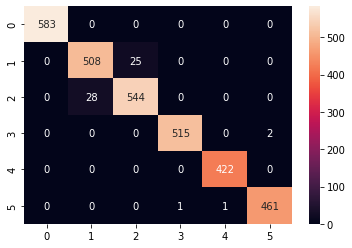

In [ ]:
sb.heatmap(confusion_matrix(y_test ,y_pred['l1']),annot =True,fmt='d')